# Logistic Regression using Scikit-Learn

#### Python Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, RocCurveDisplay

In [36]:
%matplotlib inline
plt.style.use('seaborn')
np.random.seed(101)

#### Load the Heart Failure Data Set
Source: [UCI Machine Learning Repository - Heart Failure Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

**Data Set Information:**

The dataset contains the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

**Feature Information:**

Thirteen (13) clinical features:

- `age`: age of the patient (years)
- `anaemia`: decrease of red blood cells or hemoglobin (boolean)
- `high blood pressure`: if the patient has hypertension (boolean)
- `creatinine phosphokinase (CPK)`: level of the CPK enzyme in the blood (mcg/L)
- `diabetes`: if the patient has diabetes (boolean)
- `ejection fraction`: percentage of blood leaving the heart at each contraction (percentage)
- `platelets`: platelets in the blood (kiloplatelets/mL)
- `sex`: woman or man (binary)
- `serum creatinine`: level of serum creatinine in the blood (mg/dL)
- `serum sodium`: level of serum sodium in the blood (mEq/L)
- `smoking`: if the patient smokes or not (boolean)
- `time`: follow-up period (days)
- `death event`: if the patient deceased during the follow-up period (boolean)

In [37]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'
heart_failure_df = pd.read_csv(url)
heart_failure_df.rename(columns={'DEATH_EVENT': 'death_event', 'creatinine_phosphokinase': 'cpk_enzyme', 'high_blood_pressure': 'high_bp'}, inplace=True)

#### Display the feature information about the heart failure data set

In [38]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                299 non-null    float64
 1   anaemia            299 non-null    int64  
 2   cpk_enzyme         299 non-null    int64  
 3   diabetes           299 non-null    int64  
 4   ejection_fraction  299 non-null    int64  
 5   high_bp            299 non-null    int64  
 6   platelets          299 non-null    float64
 7   serum_creatinine   299 non-null    float64
 8   serum_sodium       299 non-null    int64  
 9   sex                299 non-null    int64  
 10  smoking            299 non-null    int64  
 11  time               299 non-null    int64  
 12  death_event        299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Display the counts for non-death vs death

In [39]:
heart_failure_df['death_event'].value_counts()

0    203
1     96
Name: death_event, dtype: int64

#### Describe the summary statistics for the heart failure dataset

In [40]:
heart_failure_df.describe()

,age,anaemia,cpk_enzyme,diabetes,ejection_fraction,high_bp,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Create the training and test data sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(heart_failure_df, heart_failure_df['death_event'], test_size=0.25, random_state=101)

#### Display the correlation matrix for the heart failure data set as a heatmap

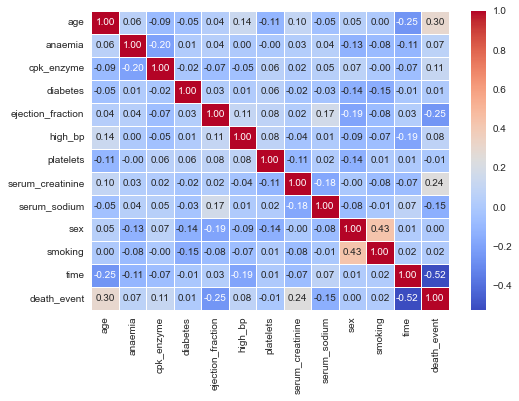

In [42]:
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='0.2f', linewidth=0.5)
plt.show()

#### Drop the features with low correlation

Dropped features: `anaemia`, `cpk_enzyme`, `diabetes`, `high_bp`, `platelets`, `sex`, and `smoking`

In [43]:
X_train_f = X_train.drop(['death_event', 'anaemia', 'cpk_enzyme', 'diabetes', 'high_bp', 'platelets', 'sex', 'smoking'], axis=1)
X_test_f = X_test.drop(['death_event', 'anaemia', 'cpk_enzyme', 'diabetes', 'high_bp', 'platelets', 'sex', 'smoking'], axis=1)

#### Display the first 10 rows of the training data set

In [44]:
X_train_f.head(10)

,age,ejection_fraction,serum_creatinine,serum_sodium,time
250,50.0,30,0.5,139,214
17,45.0,14,0.8,127,14
118,65.0,60,0.9,140,94
167,59.0,20,2.4,134,135
73,65.0,50,1.3,137,72
55,95.0,30,2.0,132,50
226,58.0,25,1.3,132,205
183,75.0,38,2.5,134,162
31,85.0,45,3.0,132,28
181,59.0,25,1.0,136,150


#### Display a boxplot between `death_event` and `age` to understand their relationship

We see that the death rate is more in older aged individuals

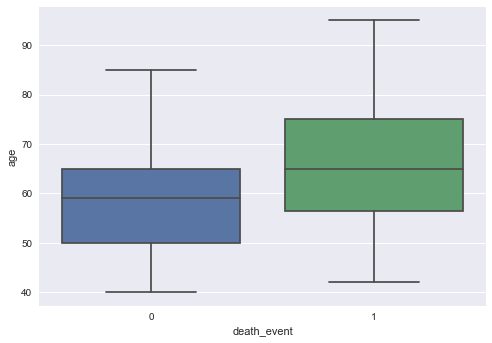

In [59]:
sns.boxplot(x='death_event', y='age', data=X_train)
plt.show()

#### Display a boxplot between `death_event` and `ejection_fraction` to understand their relationship

We see that the death occurs in individuals with lower ejection rate of blood from the heart

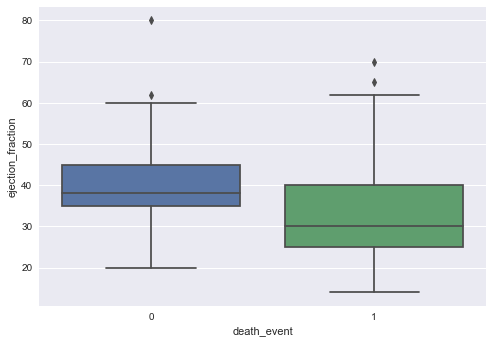

In [46]:
sns.boxplot(x='death_event', y='ejection_fraction', data=X_train)
plt.show()

#### Display a boxplot between `death_event` and `serum_creatinine` to understand their relationship

We see that the death occurs in individuals with higher serum creatinine level in the blood

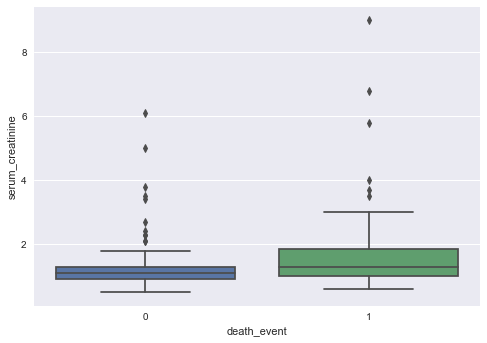

In [47]:
sns.boxplot(x='death_event', y='serum_creatinine', data=X_train)
plt.show()

#### Display a boxplot between `death_event` and `serum_sodium` to understand their relationship

We see that the death occurs in individuals with lower serum sodium level in the blood

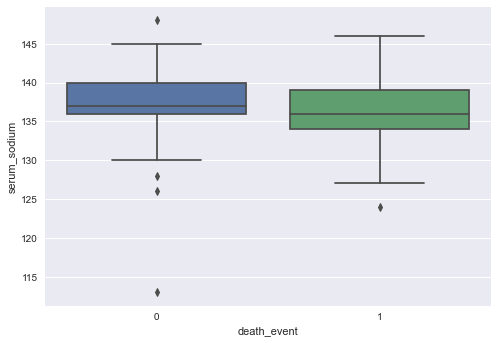

In [48]:
sns.boxplot(x='death_event', y='serum_sodium', data=X_train)
plt.show()

#### #### Scale the training and test data set

In [49]:
scaler = StandardScaler()
s_X_train_f = pd.DataFrame(scaler.fit_transform(X_train_f), columns=X_train_f.columns, index=X_train_f.index)
s_X_test_f = pd.DataFrame(scaler.fit_transform(X_test_f), columns=X_test_f.columns, index=X_test_f.index)

#### Initialize and fit the Logistic Regression model

In [50]:
model = LogisticRegression(max_iter=5000)
model.fit(s_X_train_f, y_train)

LogisticRegression(max_iter=5000)

#### Display the $\beta$ coefficient values for the selected features

Features: `age`, `ejection_fraction`, `serum_creatinine`, `serum_sodium`, `time`

In [51]:
model.coef_

array([[ 0.58326383, -0.76043317,  0.56988104, -0.10479677, -1.48542645]])

#### Predict the target `death_event` using the test data set

In [52]:
y_predict = model.predict(s_X_test_f)

#### Display the accuracy score

In [53]:
accuracy_score(y_test, y_predict)

0.84

#### Display the precision score

In [54]:
precision_score(y_test, y_predict)

0.7

#### Display the recall score

In [55]:
recall_score(y_test, y_predict)

0.7

#### Display the confusion matrix

In [56]:
confusion_matrix(y_test, y_predict)

array([[49,  6],
       [ 6, 14]])

#### Display the ROC curve

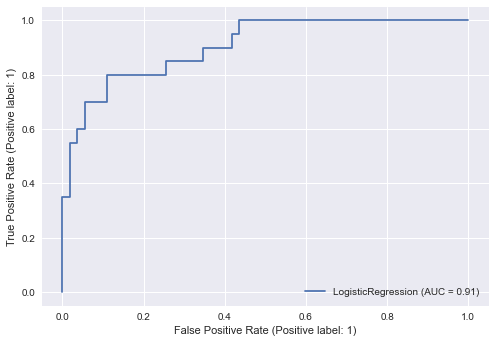

In [57]:
RocCurveDisplay.from_estimator(model, s_X_test_f, y_test)
plt.show()